Votre analyse sous forme de Jupyter Notebook déposé sur votre git en PUBLIC devra contenir:
* Une problématique pertinente (c-a-d ou il est possible de répondre avec des données)
* Au moins 1 diagramme avec données continues, type nuage de point ou histogramme
* Au moins 2 diagrammes avec des données discrètes
* Au moins 3 graphiques avec des données catégoriques
* 1 boîte à moustaches avec filtrage des données aberrantes sur le dataset (si il y en a)
* 1 heat map avec matrice de corrélation (si pertinent)
* Des commentaires clairs et pertinents pour chaque graphiques 

# Etudes de la valeur marchande des joueurs de football en Europe

varible que je pense utilisé
* player
* nationality
* position
* squad
* age
* taille (height)
* league
* foot
* minutes (jouées)
* goals
* assists 
* games
* value ***
* goals_per90
* assists_per90
* goals_assists_per90
* goals_assists
* dribbles
* Season
* interceptions
* minutes_90sm

## 1 - Problematique : Comment peut on determiner la valeur marchande d'un joueur ?

In [51]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
df = pd.read_csv('Downloads/transfermarkt_fbref_201718.csv/transfermarkt_fbref_201718.csv', sep =";")

print(df)


      Unnamed: 0          player nationality position        squad  age  \
0            379          Burgui      es ESP    FW,MF       Alavés   23   
1           2530  Raphaël Varane      fr FRA       DF  Real Madrid   24   
2            721    Rubén Duarte      es ESP       DF       Alavés   21   
3           2512   Samuel Umtiti      fr FRA       DF    Barcelona   23   
4            882     Manu García      es ESP       MF       Alavés   31   
...          ...             ...         ...      ...          ...  ...   
2227        1864  Victor Osimhen      ng NGA    FW,MF    Wolfsburg   18   
2228        2367  Renato Steffen      ch SUI    FW,MF    Wolfsburg   25   
2229        1168    Paul Jaeckel      de GER       DF    Wolfsburg   19   
2230        2546   Paul Verhaegh      nl NED       DF    Wolfsburg   33   
2231        2620         William      br BRA       DF    Wolfsburg   22   

      birth_year     value  height                      position2  ... Pts/G  \
0           1993   

In [52]:
df.columns

Index(['Unnamed: 0', 'player', 'nationality', 'position', 'squad', 'age',
       'birth_year', 'value', 'height', 'position2',
       ...
       'Pts/G', 'xG', 'xGA', 'xGDiff', 'xGDiff/90', 'Attendance', 'CL',
       'WinCL', 'CLBestScorer', 'Season'],
      dtype='object', length=400)

Reduction des colonnes: on va garder que les colonnes qui sont suceptibles de nous interesser

In [102]:
df = df[["player",
            "nationality"
            ,"position"
            ,"squad"
            ,"age"
            ,"height" 
            ,"league"
            ,"foot"
            ,"minutes"
            ,"goals"
            ,"assists"
            ,"games"
            ,"value"
            ,"goals_per90"
            ,"assists_per90"
            ,"goals_assists_per90"
            ,"dribbles"
            ,"interceptions"
             ,"goals_assists_per90m"
            ,"minutes_90s",
                "WinCL"]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2232 entries, 0 to 2231
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   player                2232 non-null   object 
 1   nationality           2232 non-null   object 
 2   position              2232 non-null   object 
 3   squad                 2232 non-null   object 
 4   age                   2232 non-null   int64  
 5   height                2232 non-null   int64  
 6   league                2232 non-null   object 
 7   foot                  2227 non-null   object 
 8   minutes               2232 non-null   int64  
 9   goals                 2232 non-null   int64  
 10  assists               2232 non-null   int64  
 11  games                 2232 non-null   int64  
 12  value                 2232 non-null   int64  
 13  goals_per90           2232 non-null   float64
 14  assists_per90         2232 non-null   float64
 15  goals_assists_per90  

## Au moins 1 diagramme avec données continues, type nuage de point ou histogramme

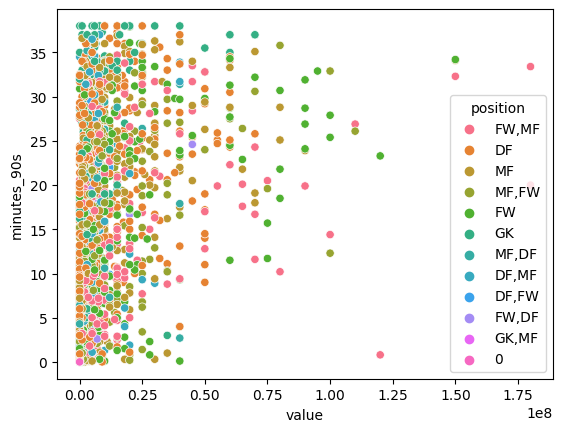

In [103]:
sb.scatterplot(data=df, x="value", y="minutes_90s", hue = "position");

#### Au moins 2 diagrammes avec des données discrètes

###### - la valeur par rapport à l'age

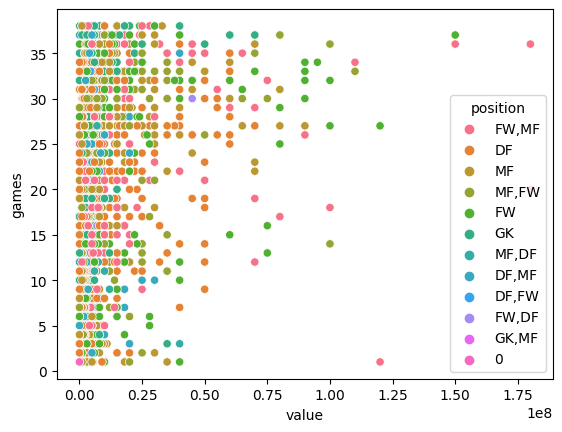

In [104]:
sb.scatterplot(data=df, x="value", y="games", hue = "position");

##### - la valeur par rapport aux buts

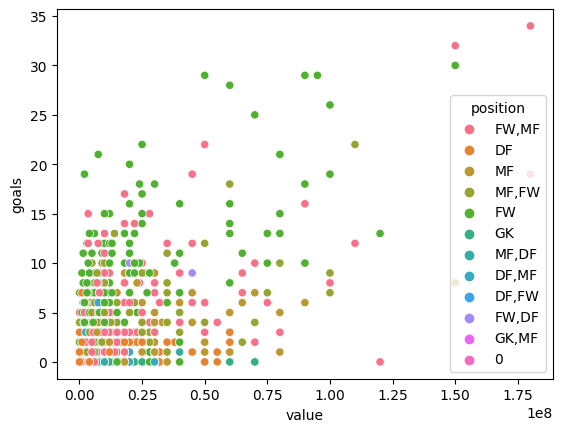

In [64]:
sb.scatterplot(data=df, x="value", y="goals", hue = "position");

### Au moins 3 graphiques avec des données catégoriques

##### - la valeur par rapport aux championnat où le joueur evolue

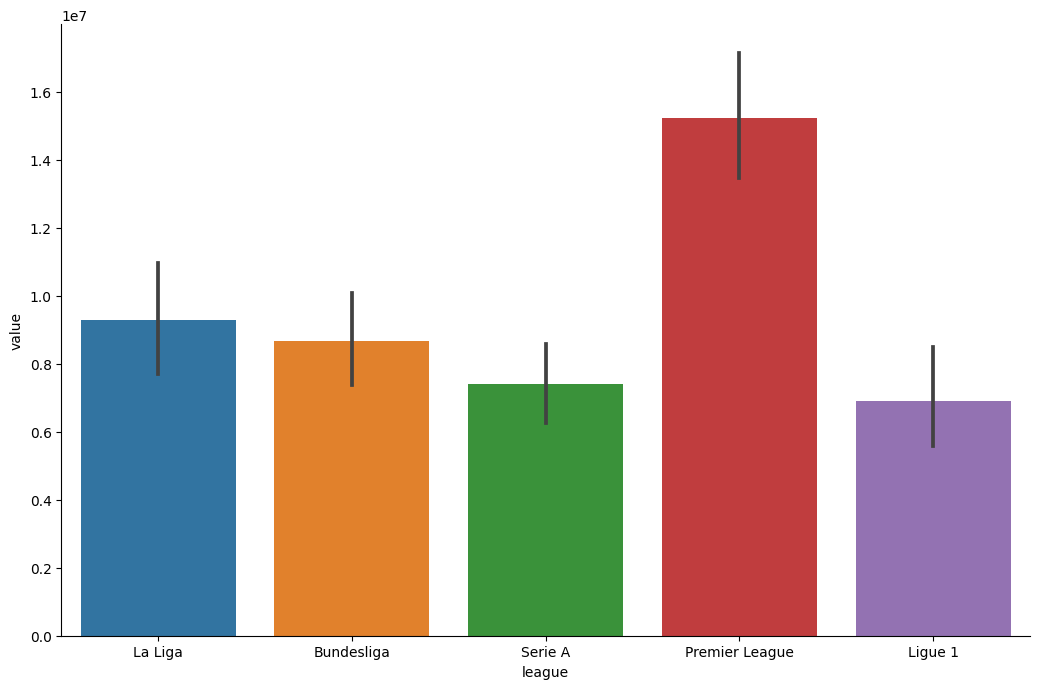

In [45]:
sb.catplot(data=df, y="value", x="league", kind="bar",  height=7, aspect=1.5)

##### - la valeur par rapport aux championnat où le joueur evolue

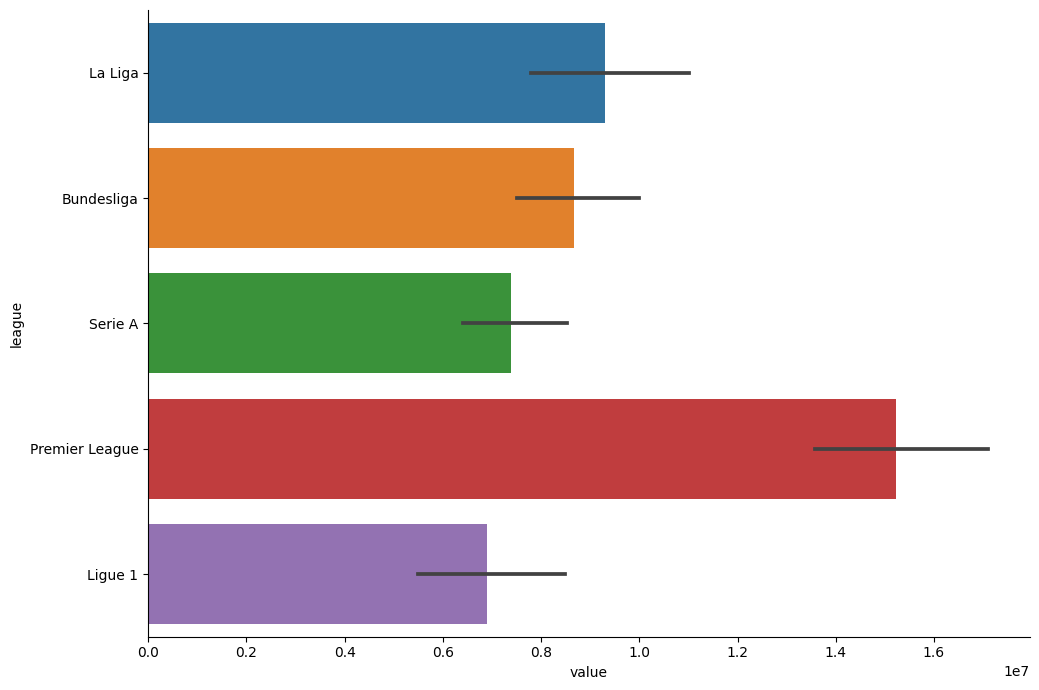

In [97]:
sb.catplot(data=df, x="value", y="league", kind="bar",  height=7, aspect=1.5)


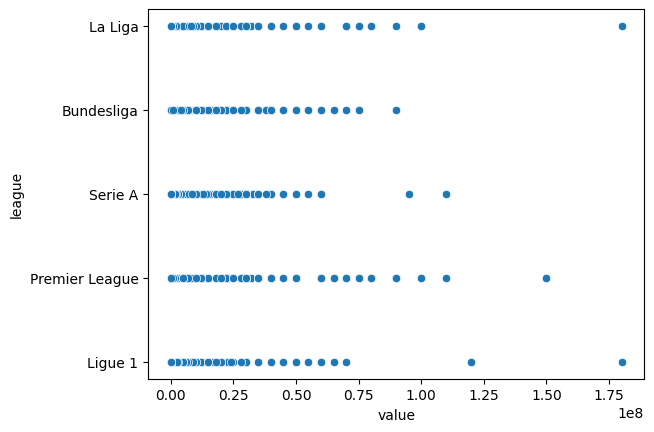

In [79]:

sb.scatterplot(data=df, x="value", y="league");

##### - la valeur par rapport aux championnat où le joueur evolue

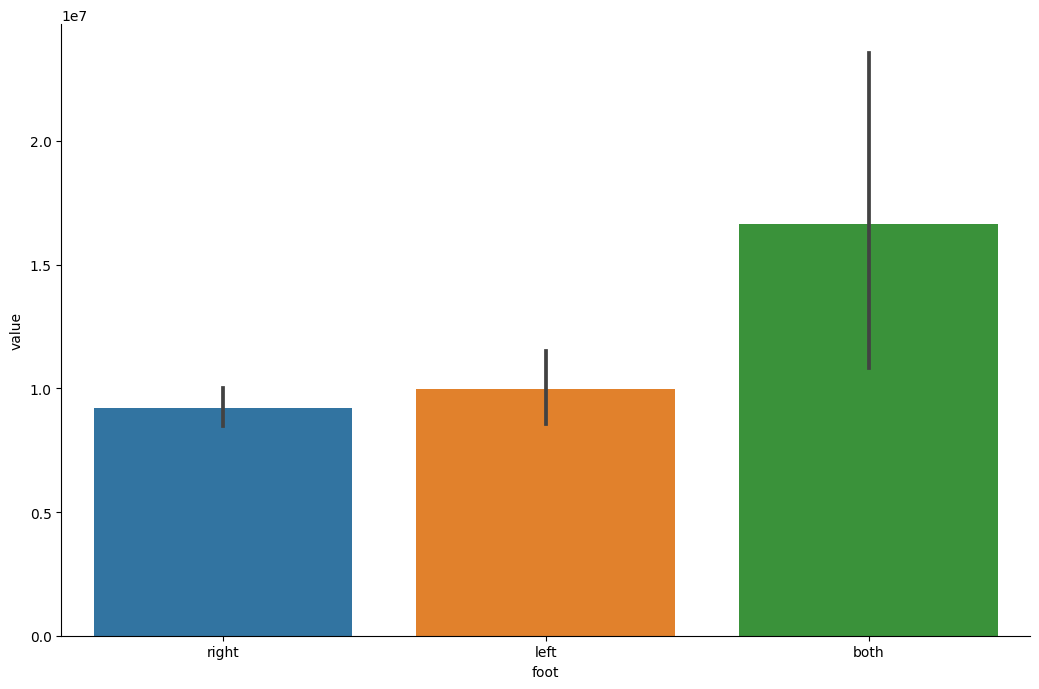

In [65]:
sb.catplot(data=df, y="value", x="foot", kind="bar",  height=7, aspect=1.5)

<AxesSubplot:xlabel='league', ylabel='value'>

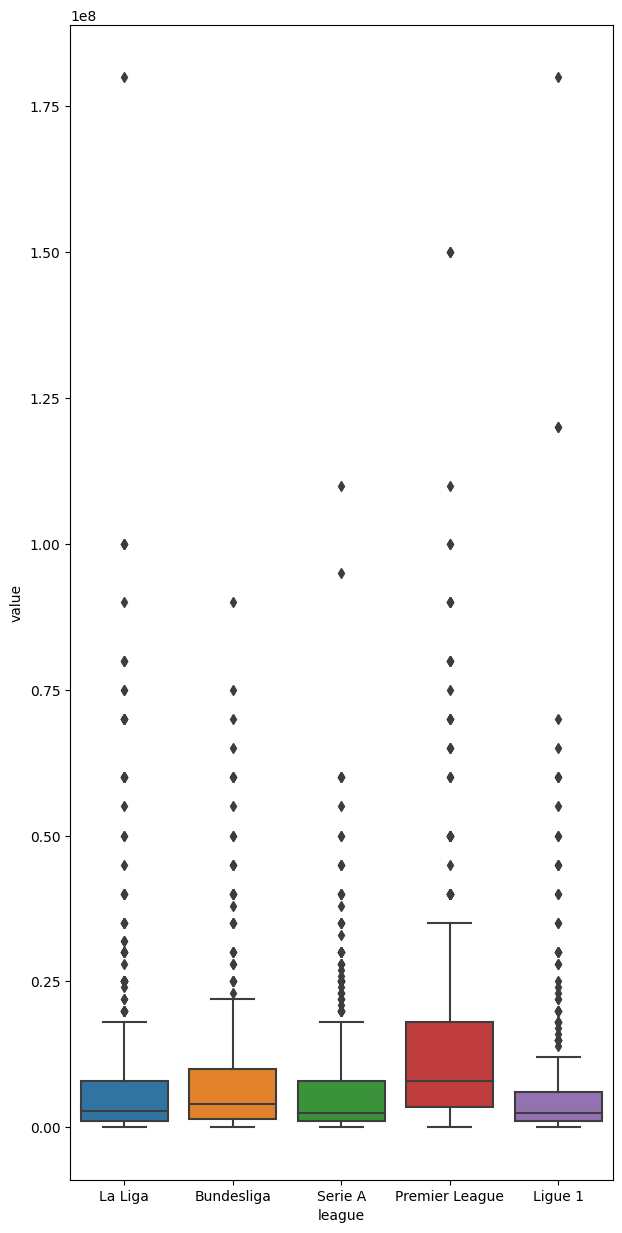

In [111]:
plt.figure(figsize=(7, 15))

sb.boxplot(data=df, y="value", x="league")



In [122]:
df["league"] = df["league"].replace(['La Liga', 'Premier League', 'Ligue 1', 'Bundesliga', 'Serie A league' ], [int(1), int(2), int(3), int(4), int(5)])
#ibm['Attrition'] = ibm['Attrition'].replace(['Yes',No'],[0,1])
#corr = df.corr()
#corr

C:\Users\DELL\AppData\Local\Temp\ipykernel_16308\4268480384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["league"] = df["league"].replace(['La Liga', 'Premier League', 'Ligue 1', 'Bundesliga', 'Serie A league' ], [int(1), int(2), int(3), int(4), int(5)])


In [126]:
print(df["league"].dtypes)
corr = df.corr();
print(corr)

object
                           age    height   minutes     goals   assists  \
age                   1.000000  0.041618  0.176074  0.032553  0.007389   
height                0.041618  1.000000  0.059743 -0.082296 -0.217525   
minutes               0.176074  0.059743  1.000000  0.370506  0.447124   
goals                 0.032553 -0.082296  0.370506  1.000000  0.544909   
assists               0.007389 -0.217525  0.447124  0.544909  1.000000   
games                 0.151376 -0.011085  0.943372  0.423612  0.489720   
value                -0.081422 -0.044236  0.336962  0.559775  0.528091   
goals_per90           0.031520  0.016313  0.000882  0.265147  0.108190   
assists_per90        -0.053280 -0.194170  0.113958  0.285379  0.632451   
goals_assists_per90   0.017215 -0.030588  0.027893  0.319963  0.253310   
dribbles             -0.065166 -0.285959  0.458630  0.553566  0.656694   
interceptions         0.083799 -0.038427  0.668265  0.041568  0.225227   
goals_assists_per90m  0.052478 

<AxesSubplot:>

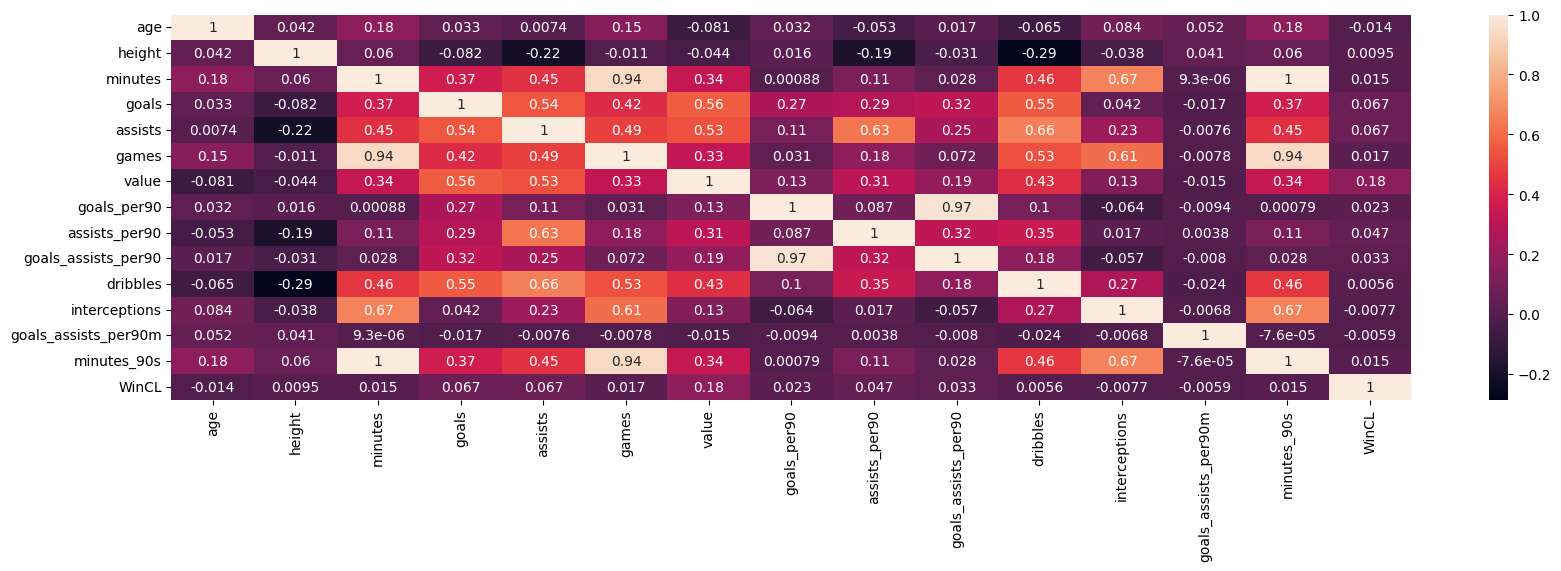

In [117]:
f, ax = plt.subplots(figsize=(20,5))
sb.heatmap(corr, annot=True, ax =ax)
#plt.savefig('heatmapEX1.png')